In [33]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt 


In [34]:
df = pd.read_csv('Tesla_stock.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2666 non-null   object 
 1   Close   2666 non-null   float64
 2   High    2666 non-null   float64
 3   Low     2666 non-null   float64
 4   Open    2666 non-null   float64
 5   Volume  2666 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 125.1+ KB


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

In [37]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Year      0
Month     0
Day       0
dtype: int64

In [38]:
# Creating MA7 and MA30 where MA7 is the 7-day moving average and MA30 is the 30-day moving average

df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window= 30).mean()

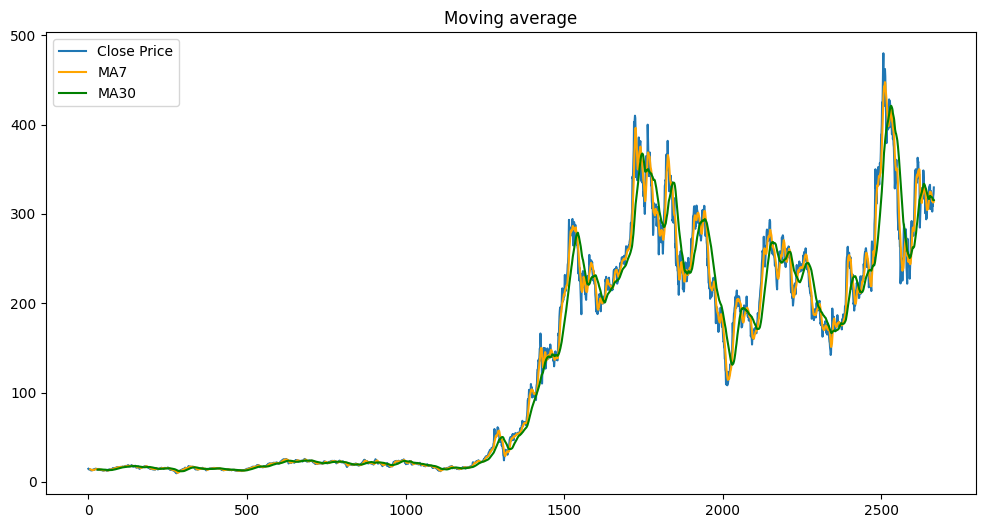

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = 'Close Price')
plt.plot(df['MA7'], label = 'MA7', color = 'orange')
plt.plot(df['MA30'], label = 'MA30', color = 'green')
plt.legend()
plt.title('Moving average')
plt.show()

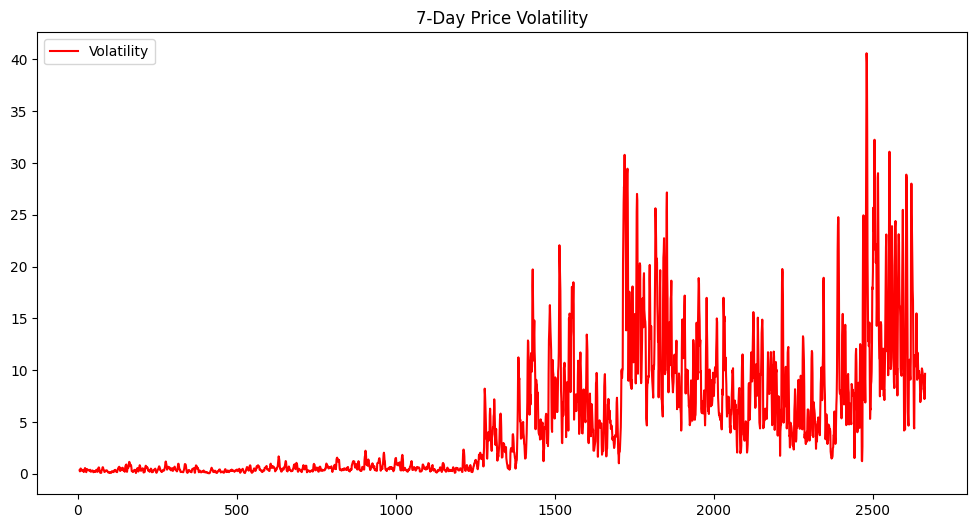

In [40]:
# Creating Volatility, which is the standard deviation of the closing price over a 7-day window

df['Volatility'] = df['Close'].rolling(window= 7).std()

plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label = 'Volatility', color = 'red')
plt.legend()
plt.title('7-Day Price Volatility')
plt.show()

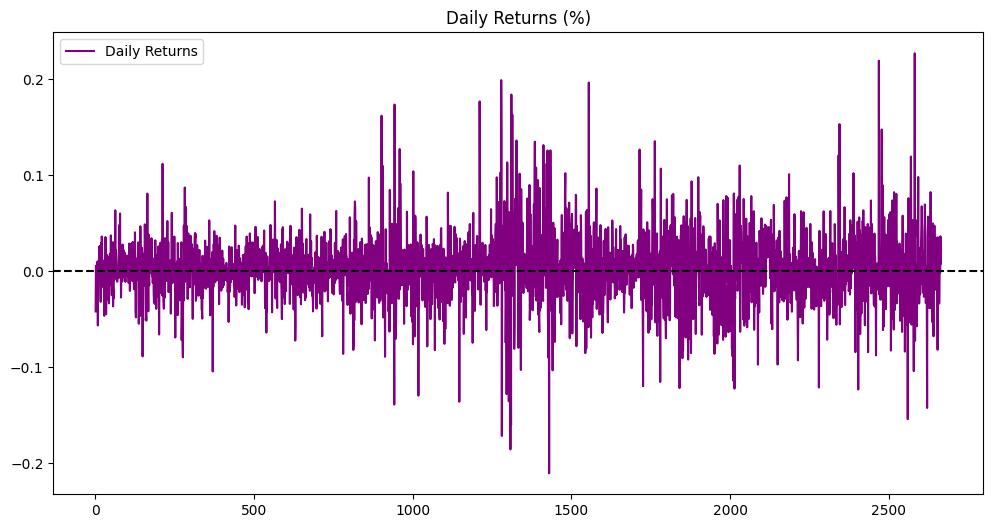

In [41]:
# Creating Daily returns which captures momentum direction

df['Return'] = df['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(df['Return'], label = 'Daily Returns', color = 'purple')
plt.axhline(0, color = 'black', linestyle = '--')
plt.legend()
plt.title('Daily Returns (%)')
plt.show()

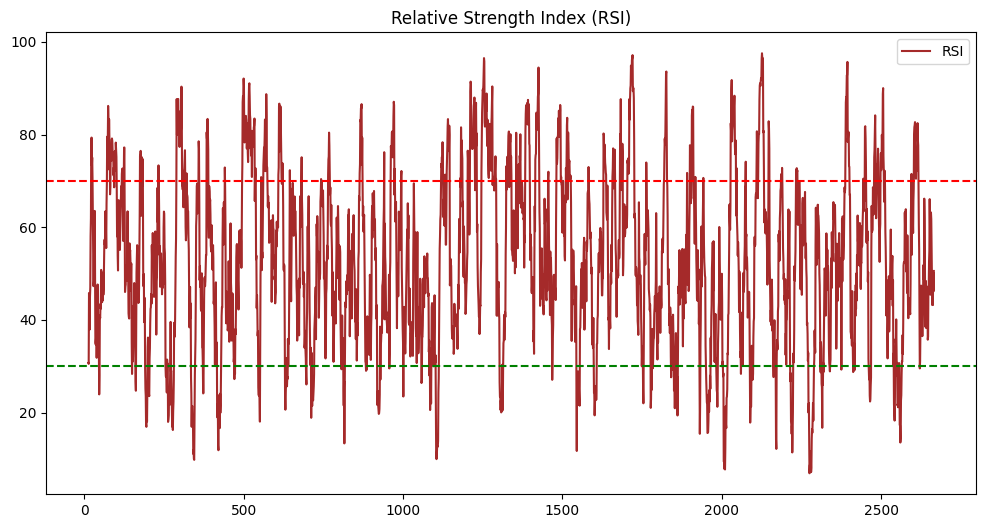

In [42]:
# Calculating RSI (relative strength index) - Overbrought/ Oversold signal
# RSI ranges from 0-100
# Above 70 - Overbrought (Price too high, might drop)
# Above 20 - Oversold (Price too low, might rise)

def compute_rsi(data, window= 14):
   delta = data.diff()
   gain = np.where( delta > 0, delta, 0)
   loss = np.where( delta < 0, -delta, 0)
   avg_gain = pd.Series(gain).rolling(window= window).mean()
   avg_loss = pd.Series(loss).rolling(window = window).mean()
   rs = avg_gain/ avg_loss
   return 100 - (100/ (1 + rs))

df['RSI'] = compute_rsi(df['Close'])

plt.figure(figsize=(12,6))
plt.plot(df['RSI'], label = 'RSI', color = 'brown')
plt.axhline(70, color = 'red', linestyle = '--')
plt.axhline(30, color = 'green', linestyle= '--')
plt.legend()
plt.title('Relative Strength Index (RSI)')
plt.show()
   

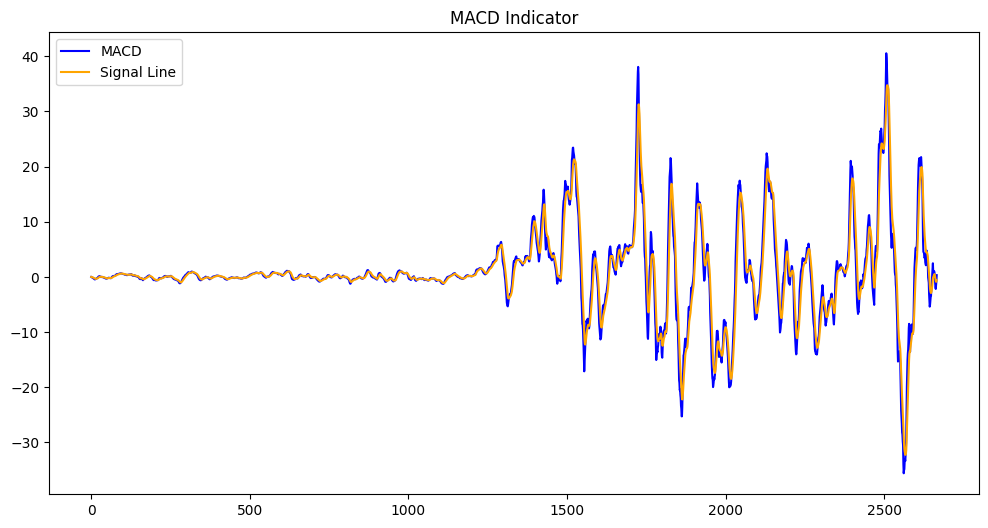

In [43]:
df['EMA12'] = df['Close'].ewm(span = 12, adjust = False).mean()
df['EMA26'] = df['Close'].ewm(span = 26, adjust = False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span = 9, adjust = False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['MACD'], label = 'MACD', color = 'blue')
plt.plot(df['Signal'], label = 'Signal Line', color = 'orange')
plt.legend()
plt.title('MACD Indicator')
plt.show()

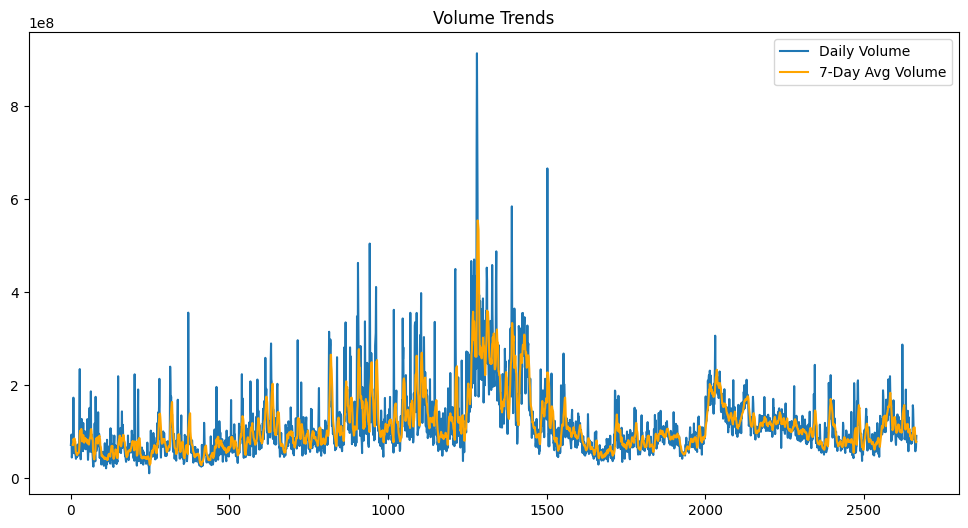

In [44]:
# Calculating Volume Featureswhich indicates Buying/ Selling Pressure
df['Vol_MA7'] = df['Volume'].rolling(window = 7).mean()
df['Volatility_Ratio'] = df['Volume'] / df['Vol_MA7']

plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label = 'Daily Volume')
plt.plot(df['Vol_MA7'], label = '7-Day Avg Volume', color = 'orange')
plt.legend()
plt.title('Volume Trends')
plt.show()

In [45]:
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)

In [46]:
# Define Target Column to Calculate the will stock go up(1) or Down(0) Tomarrow ?

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)  

# Predicting the exact next-day Price or % change

# df['Target'] = df['Close'].shift(-1)

In [47]:
df.drop(columns=['Close'], inplace=True)

In [48]:
df.dropna(inplace=True)

In [49]:
df.to_csv('PreProcesseData.csv', index = False)